In [2]:
from MAD import *
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pandas as pd

In [3]:
def ABC_iter(par):
    np.random.seed()
    N=1001
    med,MAD=-2,3
    x_0=np.random.normal(loc=0,scale=3)
    gamma=np.random.gamma(shape=2,scale=2)
    y=scipy.stats.cauchy.rvs(loc=x_0,scale=gamma,size=N)
    D=np.linalg.norm(medMAD(y)-np.array([med,MAD]))
    return [x_0,gamma,D]

In [4]:
def ABC(med,MAD,T,N,tps_max):
    debut=time.time()
    Theta=[]
    Dist=[]
    while time.time()-debut<tps_max:
        x_0=np.random.normal(loc=0,scale=1)
        gamma=np.random.gamma(shape=1,scale=1)
        y=scipy.stats.cauchy.rvs(loc=x_0,scale=gamma,size=N)
        D=np.linalg.norm(medMAD(y)-np.array([med,MAD]))
        Theta.append([x_0,gamma])
        Dist.append(D)
    print(len(Dist))
    return Theta,Dist

In [11]:
from multiprocessing import Pool


# Pick the amount of processes that works best for you
processes = 8

with Pool(processes) as pool:
    processed = pool.map(ABC_iter, range(10000000))

In [10]:
T=1000000
N=1001
med,MAD=-2,3
Gibbs=Gibbs_med_MAD(T,N,med,MAD,1,"cauchy",par_prior=[0,3,2,2],std_prop1=0.5,std_prop2=0.5,verbose=True)

100%|██████████| 1000000/1000000 [07:34<00:00, 2201.24it/s]


Acceptation rate of loc = 31.33% and of scale = 31.41%


In [7]:
abc=pd.DataFrame(np.array(processed).T,index=["x_0","gamma","Dist"]).T
abc.sort_values(by="Dist",inplace=True)
abc.head()

,x_0,gamma,Dist
618322,-1.976988,3.111861,0.006616
849708,-2.071223,3.124984,0.009110
151935,-2.044118,3.175343,0.009737
609687,-1.948099,2.948575,0.011800
609197,-2.117922,3.073466,0.011826


In [59]:
len(abc["x_0"].iloc[:T]),len(Gibbs["chains"][0])

(100001, 100001)

epsilon = 1.3653289883197017


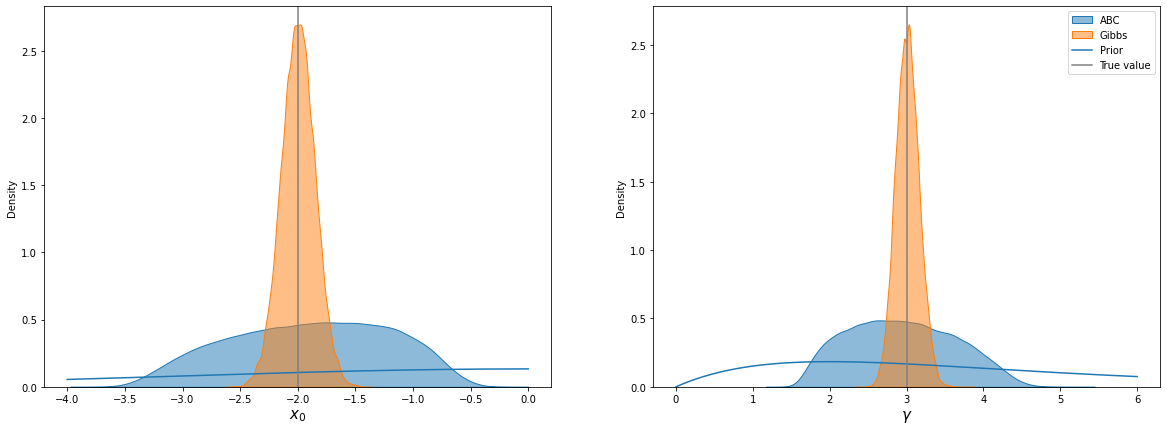

In [9]:
T=100001
eps=abc["Dist"].iloc[T]
print("epsilon =",eps)
f,ax=plt.subplots(1,2,figsize=(20,7))

sns.kdeplot(abc["x_0"].iloc[:T],label="ABC",ax=ax[0],fill=True,alpha=0.5)
sns.kdeplot(Gibbs["chains"][0],label="Gibbs",ax=ax[0],fill=True,alpha=0.5)

x=np.linspace(-4,0,1000)
ax[0].plot(x,scipy.stats.norm.pdf(x,loc=0,scale=3),label="Prior")
ax[0].axvline(x=med,color="grey",label="True value")
ax[0].set_xlabel("$x_0$",fontsize=15)

sns.kdeplot(abc["gamma"].iloc[:T],label="ABC",ax=ax[1],fill=True,alpha=0.5)
sns.kdeplot(Gibbs["chains"][1],label="Gibbs",ax=ax[1],fill=True,alpha=0.5)
x=np.linspace(0,6,1000)
ax[1].plot(x,scipy.stats.gamma.pdf(x,a=2,scale=2),label="Prior")
ax[1].axvline(x=MAD,color="grey",label="True value")
ax[1].set_xlabel("$\gamma$",fontsize=15)
plt.legend()